# Fourier transforms 

## From very naive approximations of the spectrum to more complex examples:


In [1]:
from __future__ import division


from scipy import fft
import numpy as np
# redefine default figure size and fonts
import matplotlib as mpl
# mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif',size=14)
mpl.rc('figure',figsize=(6,5))

import matplotlib.pyplot as plt

%matplotlib inline

## Two basic ploting functions that repeat the actuall spectral analysis:

In [2]:
def spectrum(y,Fs):
    """
    Plots a Single-Sided Amplitude Spectrum of a sampled
    signal y(t), sampling frequency Fs (lenght of a signal 
    provides the number of samples recorded)
    
    Following: http://goo.gl/wRoUn
    """
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(np.int(n/2))] # one side frequency range
    Y = 2*fft.fft(y)/n # fft computing and normalization
    Y = Y[range(np.int(n/2))]
    return (frq, Y)


def plotSignal(A,ff,fs,N):

    T = N/fs # sampling period
    t = np.arange(0.0,T,T/N) # sampling time steps
    y = A*np.sin(2*np.pi*ff*t) # sampled signal
    frq,Y = spectrum(y,fs) # FFT(sampled signal)
    
    # Plot
    plt.figure(figsize=(8,6))
    plt.subplot(2,1,1)
    plt.plot(t,y,'b:.')
    plt.xlabel('$t$ [s]')
    plt.ylabel('Y [V]')
    # axes().set_aspect(0.2)
    # title('sampled signal')
    plt.subplot(2,1,2)
    plt.plot(frq,abs(Y),'r') # plotting the spectrum
    plt.xlabel('$f$ (Hz)')
    plt.ylabel('$|Y(f)|$')
    
    
    

## More elaborate example, demonstration of a leakage effect:

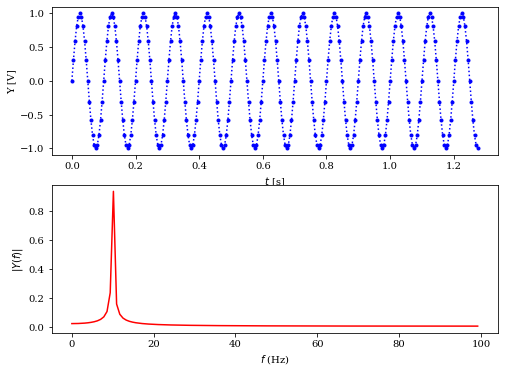

In [3]:
# We sample a signal at fs = 200 Hz and record 256 points"

A = 1.0 # Volt, amplitude
ff = 10.0 # Hz, signal frequency, zero harmonics


# We will work with different sampling frequencies
# and different lengths of records:

fs = 200.0 #Hz
N = 256 # points

plotSignal(A,ff,fs,N)

### Let us try to minimize the leakage problem

#### Let's first increase the sampling rate:

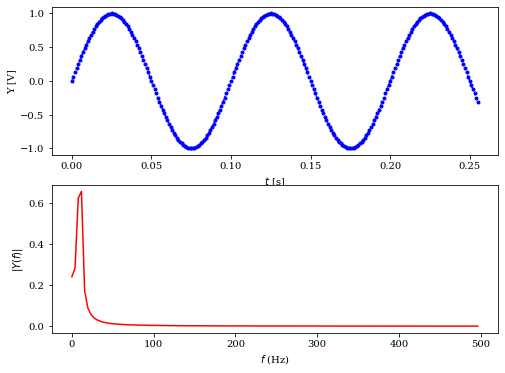

In [4]:
fs = 1000.0 #Hz
N = 256 # points
plotSignal(A,ff,fs,N)

#### Let us try to minimize the leakage problem sampling close to the Nyquist

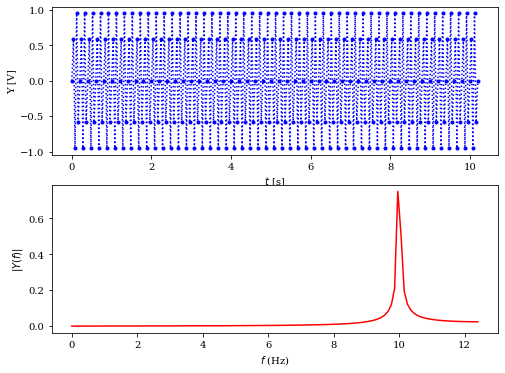

In [5]:
fs = 25.0 #Hz
N = 256 # points
plotSignal(A,ff,fs,N)


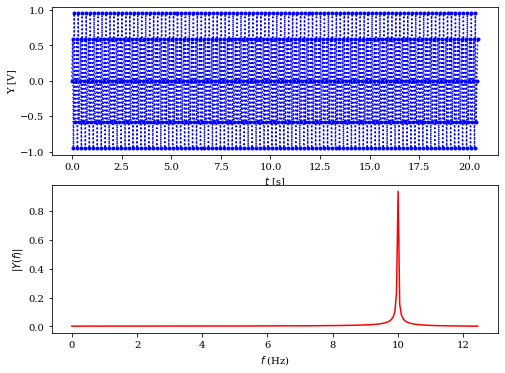

In [6]:
# Let's increase the number of points:
fs = 25.0 #Hz
N = 512 # points
plotSignal(A,ff,fs,N)

### See what the **perfect** FFT looks like:

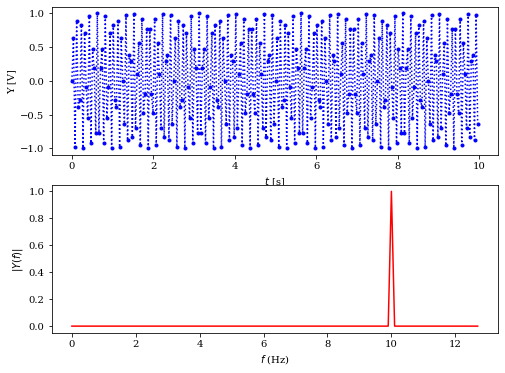

In [7]:
# Perfect FFT
# Let us try to minimize the leakage problem
fs = 25.6 #Hz
N = 256 # points
plotSignal(A,ff,fs,N)

### Now the master class: windowing:

([], <a list of 0 Text yticklabel objects>)

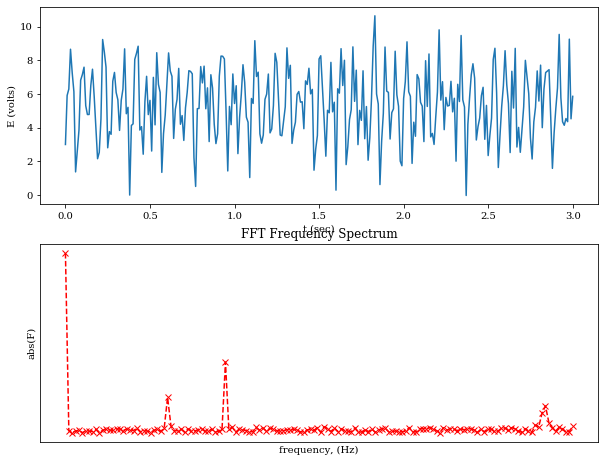

In [11]:
""" FFT demo of a signal in two ways:
a) naive way
b) windowing with DC treatment

"""

# Given:

f_s = 100.0 # sampling frequency (Hz)
T = 3.0 # total actual sample time (s)
g = np.loadtxt('../../data/FFT_Example_data_with_window.txt')

for i in range(10):
    g += np.random.rand(g.shape[0])



# Calculate
N = f_s*T  #total actual number of data points
del_t = 1./f_s  #(s)
del_f = 1./T  #(Hz)
f_fold = f_s/2.  #folding frequency = max frequency of FFT (Hz)
N_freq = N/2.  #number of discrete frequencies

t = np.arange(0.0,T+del_t,del_t)  #time, t (s)

g += 1.2*np.sin(2*np.pi*10*t)


frequency = np.arange(0,f_fold,del_f)  #frequency (Hz)
G = fft.fft(g) # FFT 
Magnitude = np.abs(G)/(N/2.)  #|F|/(N/2)
Magnitude[0] = Magnitude[0]/2
len_loc, = Magnitude.shape
A = Magnitude[0:np.int(round(len_loc/2))]
Freq = frequency[0:np.int(round(len_loc/2))]


# do it smart way

N_2 = 2**np.fix(np.log2(N)).astype('i4')  #total useful number of data points
T_2 = N_2/f_s  #total useful sample time (s)
del_f_2 = 1/T_2  #(Hz)
N_freq_2 = N_2/2  #number of useful discrete frequencies

t_2 = np.arange(0.0,T_2+del_t,del_t)  #time, t (s)
frequency_2 = np.arange(0,f_fold,del_f_2)  #frequency (Hz)
len2, = t_2.shape
DC_2 = np.mean(g[:len2-1])  #DC = mean value of input signal (V) (average of all the useful data)
g_uncoupled_2 = g[:len2-1]-DC_2  #uncoupled
u_Hann_2 = 0.5*(1-np.cos(2*np.pi*t_2[:-1]/T_2))  #u_Hanning(t)
g_Hann_2 = g_uncoupled_2*u_Hann_2  #g(t)*u_Hanning(t)
G_Hann_2 = fft.fft(g_Hann_2,N_2)  #G(omega) with Hanning window
Magnitude_Hann_2 = np.abs(G_Hann_2)*np.sqrt(8./3.)/(N_2/2)  #|F|*sqrt(8/3)/(N/2)
Magnitude_Hann_2[0] = Magnitude_Hann_2[0]/2 + DC_2  #(also divide the first one by 2, and add back the DC value)

len_loc, = Magnitude_Hann_2.shape
A_2 = Magnitude_Hann_2[0:np.int(round(len_loc/2))]
Freq_2 = frequency_2[0:np.int(round(len_loc/2))]

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(t,g)
plt.xlabel('t (sec)')
plt.ylabel('E (volts)')

plt.subplot(2,1,2)
plt.plot(frequency,Magnitude[:frequency.shape[0]],'r--x')
# plot(frequency_2,Magnitude_Hann_2[:frequency_2.shape[0]], 'r-s')
plt.xlabel('frequency, (Hz)')
plt.ylabel('abs(F)')
plt.title('FFT Frequency Spectrum')
# legend(('Simple','Window + DC'))
plt.xticks([])
plt.yticks([])